# Colors

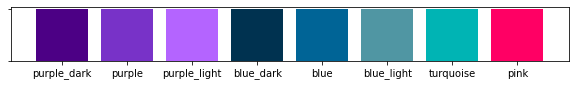

In [2]:
import matplotlib.pyplot as plt
colors = {}
colors['purple_dark'] = [76/255, 0, 133/255]
colors['purple'] = [120/255,50/255,200/255]
colors['purple_light'] = [180/255, 100/255, 1]
colors['blue_dark']=[0/255,50/255,80/255]
colors['blue']=[0,100/255,150/255]
colors['blue_light']=[80/255,150/255,163/255]
colors['turquoise'] = [0/255,180/255,180/255]
colors['pink'] = [255/255,0/255,100/255]

plt.figure(0, figsize=[10,1])  
for i,key in enumerate(colors.keys()):
    plt.bar([i], [1], color=colors[key])
_ = plt.xticks(range(len(colors.keys())), colors.keys())
_ = plt.yticks([0,1], ['',''])

# Pie plot

([<matplotlib.patches.Wedge at 0x280fcd04df0>,
 [Text(-0.45695648023571717, 1.000595210447554, 'soft'),
  Text(0.4569564802357173, -1.000595210447554, 'hard')],
 [Text(-0.24924898921948208, 0.5457792056986657, '63.64%  (56)'),
  Text(0.24924898921948213, -0.5457792056986657, '36.36%  (32)')])

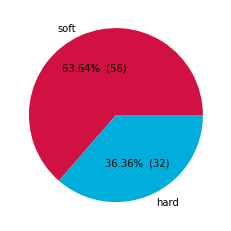

In [1]:
import matplotlib.pyplot as plt
labels = ['soft', 'hard']
values = [56, 32]
colors = ['#d11142','#00aedb']
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(values, labels=labels, autopct=make_autopct(values), colors=colors)

# Array of subplots

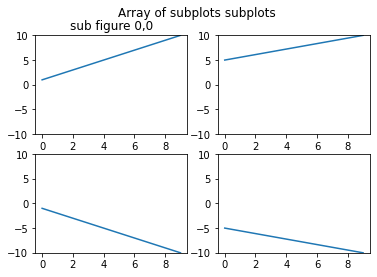

In [1]:
import matplotlib.pyplot as plt
import numpy as np
y = np.linspace(1,10,10)
z = np.linspace(5,10,10)
fig, axs = plt.subplots(2,2)
fig.suptitle('Array of subplots subplots')
axs[0,0].plot(y)
axs[1,0].plot(-y)
axs[0,1].plot(z)
axs[1,1].plot(-z)
axs[0,0].set_ylim([-10,10])
axs[0,1].set_ylim([-10,10])
axs[1,0].set_ylim([-10,10])
axs[1,1].set_ylim([-10,10])

axs[0,0].title.set_text('sub figure 0,0')

# Plot multiple ROC curves with AUC in legend

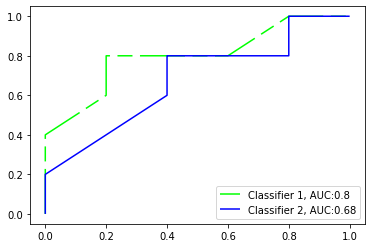

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics as met

# list of models and their predictions 
models = ['Classifier 1', 'Classifier 2']
y_preds = [np.array([0.1, 0.2, 0.3, 0.4, 0.7, 0.2, 0.6, 0.7, 0.8, 0.9]), \
           np.array([0.1, 0.8, 0.3, 0.4, 0.7, 0.2, 0.6, 0.7, 0.8, 0.9])]
assert len(models) == len(y_preds)

y_true = np.array([0]*5 + [1]*5)

results = {}
for model, y_pred  in zip(models, y_preds):
    results[model] = {}
    results[model]['fpr'], results[model]['tpr'], _ = met.roc_curve(y_true, y_pred)
    results[model]['roc_auc'] = met.roc_auc_score(y_true, y_pred)

# plot
color_list = [(0,1,0), (0,0,1)]
dashes_list = [[30, 5, 10, 5], [0, 0, 10, 0]]
fig = plt.figure(1)
for model, color, dashes in zip(models, color_list, dashes_list):
    plt.plot(results[model]['fpr'], results[model]['tpr'], color=color, dashes=dashes)
plt.legend([f"{model}, AUC:{results[model]['roc_auc']}" for model in models], loc='lower right')